In [2]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from xml.dom.minidom import parse

# Data analysis
Examine (by hand or collecting simple statistics) the train
dataset and try to infer general rules that are right in most
cases, even if they seldom apply (high precision, low recall

In [6]:
datadir = "../../labAHLT/data/train"
entities = {}
pairs = []
for f in listdir (datadir):

    tree = parse ( datadir + "/" + f)

    sentences = tree.getElementsByTagName("sentence")
    for s in sentences:

        sid = s.attributes ["id"].value # get sentence id
        stext = s.attributes ["text"].value # get sentence text

        if len(stext) == 0:
            continue

        
        ents = s.getElementsByTagName("entity")
        for e in ents:
            eid = e . attributes ["id"].value
            entities[eid] = e.attributes["text"].value
        
        prs = s.getElementsByTagName("pair")
        for p in prs:
            if p.attributes["ddi"].value == "true":
                pid = p.attributes["id"].value
                e1 = p.attributes["e1"].value
                e2 = p.attributes["e2"].value
                interaction = p.attributes["type"].value
                pairs.append({"e1": entities[e1], "e2": entities[e2], "interaction": interaction})
            
        
print(pairs)

[{'e1': 'ERGOMAR', 'e2': 'triacetyloleandomycin', 'interaction': 'mechanism'}, {'e1': 'triacetyloleandomycin', 'e2': 'ergotamine', 'interaction': 'mechanism'}, {'e1': 'ERGOMAR', 'e2': 'vasoconstrictor drugs', 'interaction': 'effect'}, {'e1': 'clorazepate dipotassium', 'e2': 'hexobarbital', 'interaction': 'effect'}, {'e1': 'clorazepate dipotassium', 'e2': 'ethyl alcohol', 'interaction': 'effect'}, {'e1': 'clorazepate dipotassium', 'e2': 'chlorpromazine', 'interaction': 'effect'}, {'e1': 'benzodiazepines', 'e2': 'barbiturates', 'interaction': 'effect'}, {'e1': 'benzodiazepines', 'e2': 'narcotics', 'interaction': 'effect'}, {'e1': 'benzodiazepines', 'e2': 'phenothiazines', 'interaction': 'effect'}, {'e1': 'benzodiazepines', 'e2': 'monoamine oxidase inhibitors', 'interaction': 'effect'}, {'e1': 'benzodiazepines', 'e2': 'antidepressants', 'interaction': 'effect'}, {'e1': 'FLEXERIL', 'e2': 'MAO inhibitors', 'interaction': 'int'}, {'e1': 'FLEXERIL', 'e2': 'alcohol', 'interaction': 'effect'}, 

In [7]:
df = pd.DataFrame(pairs)
df.head(10)

,e1,e2,interaction
0,ERGOMAR,triacetyloleandomycin,mechanism
1,triacetyloleandomycin,ergotamine,mechanism
2,ERGOMAR,vasoconstrictor drugs,effect
3,clorazepate dipotassium,hexobarbital,effect
4,clorazepate dipotassium,ethyl alcohol,effect
5,clorazepate dipotassium,chlorpromazine,effect
6,benzodiazepines,barbiturates,effect
7,benzodiazepines,narcotics,effect
8,benzodiazepines,phenothiazines,effect
9,benzodiazepines,monoamine oxidase inhibitors,effect


In [8]:


interaction_counts = pd.DataFrame(df.groupby('interaction').count()['e1'])
interaction_counts

,e1
interaction,
advise,697
effect,1450
int,231
mechanism,1020


Text(0.5, 0, '')

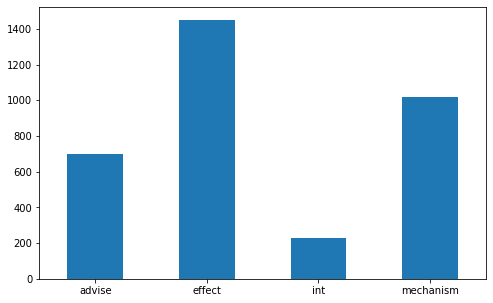

In [9]:
ax = interaction_counts.plot.bar(figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

In [24]:
df_advise = df.loc[df['interaction']=='advise']
df_effect = df.loc[df['interaction']=='effect']
df_int = df.loc[df['interaction']=='int']
df_mechanism = df.loc[df['interaction']=='mechanism']



In [45]:
advise_counts_e1 = pd.DataFrame({'Count': df_advise['e1'].value_counts()})
print(advise_counts_e1.head(10))
advise_counts_e2 = pd.DataFrame({'Count': df_advise['e2'].value_counts()})
print(advise_counts_e2.head(10))

advise_counts = pd.concat([advise_counts_e1, advise_counts_e2])
advise_counts = advise_counts.groupby(advise_counts.index).sum().sort_values(by="Count", ascending=False)
print(advise_counts.head(10))

              Count
bupropion        16
TARCEVA          14
glimepiride      12
Duloxetine       11
NSAIDs           11
paricalcitol     11
ZEBETA           10
alosetron         9
VISTIDE           9
BREVIBLOC         8
                           Count
SPRYCEL                       18
ketoconazole                  17
warfarin                      13
tricyclic antidepressants     12
itraconazole                   9
DETROL LA                      9
FACTIVE                        9
Aprepitant                     8
Levo-Dromoran                  7
lithium                        7
                           Count
ketoconazole                  23
tricyclic antidepressants     20
SPRYCEL                       19
bupropion                     16
Aprepitant                    16
warfarin                      16
NSAIDs                        14
TARCEVA                       14
glimepiride                   12
sumatriptan                   12


In [44]:
effect_counts_e1 = pd.DataFrame({'Count': df_effect['e1'].value_counts()})
effect_counts_e2 = pd.DataFrame({'Count': df_effect['e2'].value_counts()})
print(effect_counts_e1.head(10))
print(effect_counts_e2.head(10))
effect_counts = pd.concat([effect_counts_e1, effect_counts_e2])
effect_counts = effect_counts.groupby(effect_counts.index).sum().sort_values(by="Count", ascending=False)
print(effect_counts.head(10))

                           Count
anticoagulant                 79
benzodiazepines               24
phenytoin                     20
sulfonylureas                 18
NIMBEX                        16
NUROMAX                       16
NSAIDs                        15
nondepolarizing agents        15
tricyclic antidepressants     14
Levo-Dromoran                 12
                              Count
alcohol                          38
warfarin                         28
barbiturates                     21
anticoagulants                   19
insulin                          16
antihistamines                   16
tricyclic antidepressants        16
morphine                         16
monoamine oxidase inhibitors     15
CNS depressants                  14
                              Count
anticoagulant                    80
alcohol                          44
warfarin                         32
tricyclic antidepressants        30
benzodiazepines                  30
phenytoin                

In [41]:
mechanism_counts_e1 = pd.DataFrame({'Count': df_mechanism['e1'].value_counts()})
mechanism_counts_e2 = pd.DataFrame({'Count': df_mechanism['e2'].value_counts()})
print(mechanism_counts_e1.head(10))
print(mechanism_counts_e2.head(10))
mechanism_counts = pd.concat([mechanism_counts_e1, mechanism_counts_e2])
mechanism_counts = mechanism_counts.groupby(mechanism_counts.index).sum().sort_values(by="Count", ascending=False)
print(mechanism_counts.head(10))

                Count
EQUETROTM          83
phenytoin          47
ketoconazole       21
Probenecid         19
Cholestyramine     18
rifampin           17
Aprepitant         16
cimetidine         16
azithromycin       15
phenobarbital      12
                 Count
phenytoin           31
ketoconazole        22
midazolam           19
corticosteroids     19
cimetidine          17
digoxin             16
warfarin            15
theophylline        14
methotrexate        13
phenobarbital       12
               Count
EQUETROTM         83
phenytoin         78
ketoconazole      43
cimetidine        33
rifampin          25
phenobarbital     24
digoxin           23
carbamazepine     22
midazolam         22
theophylline      19


In [43]:
int_counts_e1 = pd.DataFrame({'Count': df_int['e1'].value_counts()})
int_counts_e2 = pd.DataFrame({'Count': df_int['e2'].value_counts()})

print(int_counts_e1.head(10))
print(int_counts_e2.head(10))

int_counts = pd.concat([int_counts_e1, int_counts_e2])
int_counts = int_counts.groupby(int_counts.index).sum().sort_values(by="Count", ascending=False)
print(int_counts.head(10))

                        Count
Etonogestrel               44
Methscopolamine            21
nondepolarizing agents     14
MIVACRON                   14
Bentiromide                14
alprazolam                 12
erythromycin               11
Benzthiazide                8
Melatonin                   8
Barbiturates                7
                Count
cyclosporine        5
MAO inhibitors      4
TCA                 4
antibiotics         4
quinidine           4
procainamide        3
alcohol             3
NSAIDs              3
anesthetics         3
lithium             3
                        Count
Etonogestrel               44
Methscopolamine            21
nondepolarizing agents     14
Bentiromide                14
MIVACRON                   14
alprazolam                 13
erythromycin               12
Benzthiazide                8
Melatonin                   8
Barbiturates                7


##  Checking both entities

Text(0.5, 0, '')

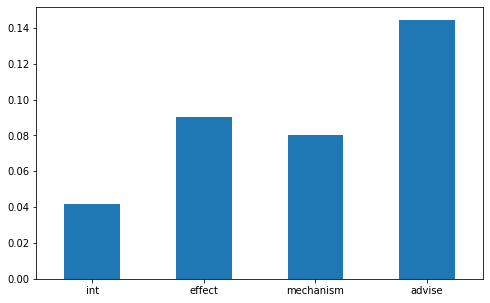

In [50]:
# one of the entities is uppercase
df1 = pd.DataFrame({'lab' : ['int', 'effect', 'mechanism', 'advise'], 'Count' : [int_counts.index.str.isupper().sum()/int_counts.shape[0],
                                                                            effect_counts.index.str.isupper().sum()/effect_counts.shape[0],
                                                                            mechanism_counts.index.str.isupper().sum()/mechanism_counts.shape[0],
                                                                            advise_counts.index.str.isupper().sum()/advise_counts.shape[0]]})

ax = df1.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

Text(0.5, 0, '')

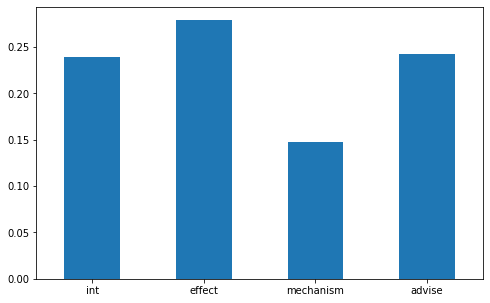

In [54]:
# one of the entities ends in s
df2 = pd.DataFrame({'lab' : ['int', 'effect', 'mechanism', 'advise'], 'Count' : [(int_counts.index.str[-1]=='s').sum()/int_counts.shape[0],
                                                                            (effect_counts.index.str[-1] == 's').sum()/effect_counts.shape[0],
                                                                            (mechanism_counts.index.str[-1] == 's').sum()/mechanism_counts.shape[0],
                                                                            (advise_counts.index.str[-1] == 's').sum()/advise_counts.shape[0]]})

ax = df2.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

## Checking e1

Text(0.5, 0, '')

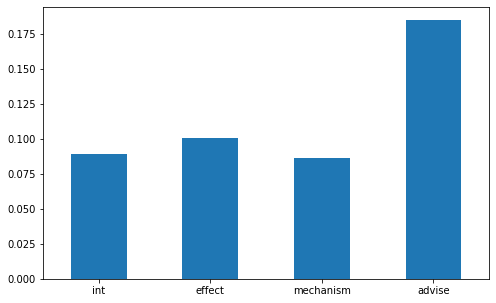

In [59]:
# e1 is uppercase
df1 = pd.DataFrame({'lab' : ['int', 'effect', 'mechanism', 'advise'], 'Count' : [int_counts_e1.index.str.isupper().sum()/int_counts_e1.shape[0],
                                                                            effect_counts_e1.index.str.isupper().sum()/effect_counts_e1.shape[0],
                                                                            mechanism_counts_e1.index.str.isupper().sum()/mechanism_counts_e1.shape[0],
                                                                            advise_counts_e1.index.str.isupper().sum()/advise_counts_e1.shape[0]]})

ax = df1.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")

## Checking e2

Text(0.5, 0, '')

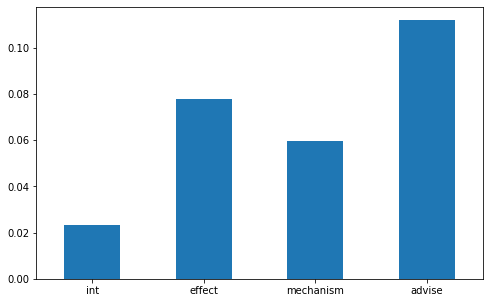

In [60]:
# e2 is uppercase
df1 = pd.DataFrame({'lab' : ['int', 'effect', 'mechanism', 'advise'], 'Count' : [int_counts_e2.index.str.isupper().sum()/int_counts_e2.shape[0],
                                                                            effect_counts_e2.index.str.isupper().sum()/effect_counts_e2.shape[0],
                                                                            mechanism_counts_e2.index.str.isupper().sum()/mechanism_counts_e2.shape[0],
                                                                            advise_counts_e2.index.str.isupper().sum()/advise_counts_e2.shape[0]]})

ax = df1.plot.bar(x='lab', y = 'Count', figsize = (8,5), rot=0, legend = False)
ax.set_xlabel("")